<a href="https://colab.research.google.com/github/GaurangPP/MyProjects/blob/main/DogVsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive #mounting drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import tensorflow as tf #libraries
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

##Downloading Data

In [ ]:
import os

os.environ['KAGGLE_USERNAME'] = "gaurangpendharkar" # username from the json file
os.environ['KAGGLE_KEY'] = "da6c2facfd02e351199bfc52b9a22f32" # key from the json file

In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.12

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
  Using cached kaggle-1.5.12-py3-none-any.whl


In [ ]:
!kaggle competitions download -c dogs-vs-cats -p /content/gdrive/MyDrive/Kaggle/Zip

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/gdrive/MyDrive/Kaggle/Zip/dogs-vs-cats.zip -d /content/gdrive/MyDrive/Kaggle/Dog_Cat

Archive:  /content/gdrive/MyDrive/Kaggle/Zip/dogs-vs-cats.zip
replace /content/gdrive/MyDrive/Kaggle/Dog_Cat/sampleSubmission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: /content/gdrive/MyDrive/Kaggle/Dog_Cat/sampleSubmission.csv  
  inflating: /content/gdrive/MyDrive/Kaggle/Dog_Cat/test1.zip  
  inflating: /content/gdrive/MyDrive/Kaggle/Dog_Cat/train.zip  


In [ ]:
!unzip /content/gdrive/MyDrive/Kaggle/Dog_Cat/train.zip -d /content/gdrive/MyDrive/Kaggle/Dog_Cat
#!unzip /content/gdrive/MyDrive/Kaggle/Dog_Cat/test1.zip -d /content/gdrive/MyDrive/Kaggle/Dog_Cat

In [ ]:
import shutil
for x in range(0,12500): #Moving files into a Cat folder
  file = "/content/gdrive/MyDrive/Kaggle/Dog_Cat/train/cat."+str(x)+".jpg"
  shutil.move(file, "/content/gdrive/MyDrive/Kaggle/Dog_Cat/train/Cat")


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import shutil
shutil.move(/content/gdrive/MyDrive/Kaggle/Dog_Cat/Split, )

In [ ]:
!pip install split-folders

In [ ]:
import splitfolders #Splits the training set into training and validation
splitfolders.ratio("/content/gdrive/MyDrive/Kaggle/Dog_Cat/train", output="/content/gdrive/MyDrive/Kaggle/Dog_Cat/Split", seed=1338, ratio=(.8, .2), group_prefix=None)

In [ ]:
!unzip /content/train-20211101T221119Z-001.zip
!unzip /content/val-20211101T180750Z-001.zip

Streaming output truncated to the last 5000 lines.
  inflating: val/Dog/dog.9999.jpg    
  inflating: val/Dog/dog.9887.jpg    
  inflating: val/Dog/dog.9880.jpg    
  inflating: val/Dog/dog.9867.jpg    
  inflating: val/Dog/dog.9869.jpg    
  inflating: val/Dog/dog.9992.jpg    
  inflating: val/Dog/dog.9910.jpg    
  inflating: val/Dog/dog.9908.jpg    
  inflating: val/Dog/dog.9944.jpg    
  inflating: val/Dog/dog.9949.jpg    
  inflating: val/Dog/dog.9966.jpg    
  inflating: val/Dog/dog.9864.jpg    
  inflating: val/Dog/dog.9946.jpg    
  inflating: val/Dog/dog.9972.jpg    
  inflating: val/Dog/dog.9873.jpg    
  inflating: val/Dog/dog.9963.jpg    
  inflating: val/Dog/dog.9970.jpg    
  inflating: val/Dog/dog.9901.jpg    
  inflating: val/Dog/dog.9977.jpg    
  inflating: val/Dog/dog.9961.jpg    
  inflating: val/Dog/dog.9971.jpg    
  inflating: val/Dog/dog.9900.jpg    
  inflating: val/Cat/cat.9943.jpg    
  inflating: val/Cat/cat.9968.jpg    
  inflating: val/Cat/cat.9971.jpg    

##Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, #applying transformations
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True
                                   )
training_set = train_datagen.flow_from_directory('/content/train', #training set
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 shuffle = True,
                                                 class_mode = 'binary',
                                                 )
validation_datagen = ImageDataGenerator(rescale = 1./255, #creating a separate datagen for validation to prevent image augmentation
                                   )
validation_set = validation_datagen.flow_from_directory('/content/val', #validation set
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'binary',
                                                 )

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
type(train_datagen)

keras.preprocessing.image.ImageDataGenerator

##Training Model

###My architecture

In [ ]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding = 'same', input_shape=[224, 224, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding = 'same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding = 'same', activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Dropout(0.2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 25)

In [ ]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


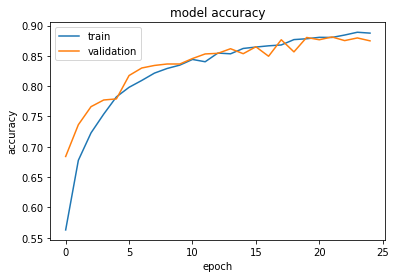

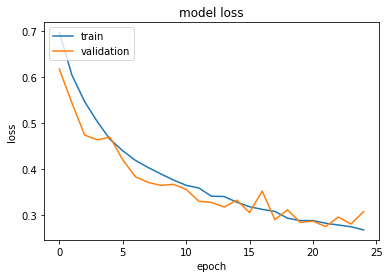

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

##VGG16 (provided by keras)

In [ ]:
datagen = ImageDataGenerator(featurewise_center=True)
datagen.mean = [123.68, 116.779, 103.939]

training_set = datagen.flow_from_directory('/content/train',class_mode = 'binary', batch_size = 64, target_size = (224,224))

validation_set = datagen.flow_from_directory('/content/val',class_mode = 'binary', batch_size = 64, target_size = (224,224))

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

In [ ]:
cnn = tf.keras.applications.VGG16(include_top = False, weights = 'imagenet', input_shape = (224,224,3))
for layer in cnn.layers:
		layer.trainable = False
flat1 = Flatten()(cnn.layers[-1].output)
class1 = Dense(256, activation='relu', kernel_initializer='he_uniform')(flat1)
class2 = Dense(128, activation='relu', kernel_initializer='he_uniform')(class1)
output = Dense(1, activation='sigmoid')(class1)
cnn = Model(inputs=cnn.inputs, outputs = output)
cnn.compile(tf.keras.optimizers.Adam(learning_rate=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = cnn.fit(x = training_set, validation_data = validation_set, epochs = 25)

Epoch 1/25
313/313 [==============================] - 91s 288ms/step - loss: 1.4941 - accuracy: 0.9414 - val_loss: 0.0666 - val_accuracy: 0.9748
Epoch 2/25
313/313 [==============================] - 88s 282ms/step - loss: 0.0341 - accuracy: 0.9879 - val_loss: 0.0699 - val_accuracy: 0.9776
Epoch 3/25
313/313 [==============================] - 88s 281ms/step - loss: 0.0136 - accuracy: 0.9951 - val_loss: 0.0893 - val_accuracy: 0.9748
Epoch 4/25
313/313 [==============================] - 88s 281ms/step - loss: 0.0083 - accuracy: 0.9966 - val_loss: 0.0913 - val_accuracy: 0.9788
Epoch 5/25
313/313 [==============================] - 88s 281ms/step - loss: 0.0122 - accuracy: 0.9950 - val_loss: 0.0959 - val_accuracy: 0.9782
Epoch 6/25
313/313 [==============================] - 88s 280ms/step - loss: 0.0082 - accuracy: 0.9962 - val_loss: 0.0986 - val_accuracy: 0.9772
Epoch 7/25
313/313 [==============================] - 88s 281ms/step - loss: 0.0057 - accuracy: 0.9974 - val_loss: 0.1120 - val_ac

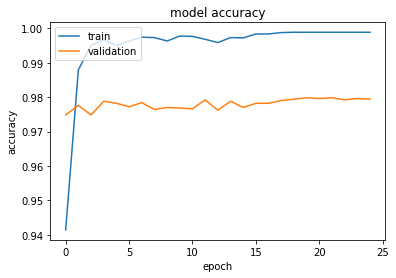

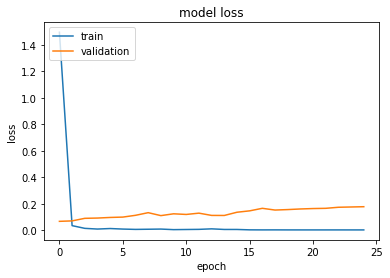

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [ ]:
cnn.save("/content/gdrive/MyDrive/Kaggle/Dog_Cat/Model")

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/Kaggle/Dog_Cat/Model/assets


In [ ]:
cnn2 = tf.keras.models.load_model('/content/gdrive/MyDrive/Kaggle/Dog_Cat/Model')


array([[1.0000000e+00],
       [6.2022573e-37],
       [2.0701227e-22],
       ...,
       [1.3584839e-16],
       [1.0000000e+00],
       [1.0000000e+00]], dtype=float32)

In [ ]:
y_pred = cnn2.predict(validation_set)

In [ ]:
y_pred.shape

(5000, 1)

##Evaluation of individual images

In [ ]:
import cv2
image_path = '/content/Dog_or_Cat_1.jpg'
from IPython.display import Image
Image(image_path)

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(image_path, target_size = (224,224)) #We are importing the test image and converting it inton 64x64
test_image = image.img_to_array(test_image) #Converting image into array
test_image = np.expand_dims(test_image, axis = 0) #Adding an extra dimension to the image otherwise the CNN won't accept it, this dimension will be the first dimension
result = cnn.predict(test_image) #Predicting
print(training_set.class_indices) #Tells us that cat=0 and dog=1
if result[0][0] == 1: #The two 0s next to result indicate that we are choosing the first result from the batch of 32 and we are picking the first prediction
  prediction = 'dog'
else:
  prediction = 'cat'

print("The image appears to be a " + prediction)